In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 300)

## Partisan Classification: BERT

In [2]:
BERT_test_results = pd.read_csv('/scratch/amh9750/capstone/capstone_bert_ft/partisan_legal_bert_test_results_32batch_5epoch_2e5lr_1wd.csv')
BERT_non_legal_results = pd.read_csv('/scratch/amh9750/capstone/capstone_bert_ft/partisan_bert_test_results_32batch_3epoch_2e5lr_1wd.csv')
RNN_LSTM_test_results = pd.read_csv('best_RNN_LSTM_model/RNN_LSTM_test_results_15epochs.csv')
baseline_test_results = pd.read_csv('/home/amr10211/us-court-partisan-bias/baseline_models/baseline_test_partisan_predictions.csv')

In [3]:
baseline_test_results['label'] = baseline_test_results['scdb_decision_direction'].apply(lambda x: 1 if x == 1 else 0)


In [4]:
# test_df = pd.read_csv('/vast/amr10211/sc-test.csv')

In [5]:
# BERT_test_results = BERT_test_results.merge(test_df, how='left', on='id')

In [6]:
BERT_test_results['sigmoid_probability'] = BERT_test_results.apply(
    lambda row: row['probability'] if row['predicted_label'] == 1 else 1 - row['probability'],
    axis=1
)

BERT_non_legal_results['sigmoid_probability'] = BERT_non_legal_results.apply(
    lambda row: row['probability'] if row['predicted_label'] == 1 else 1 - row['probability'],
    axis=1
)

In [8]:
baseline_test_results.head()

,Unnamed: 0,id,cluster_id,type,decision_text,date_filed,scdb_decision_direction,Predictions,Probability_Class_0,Probability_Class_1,label
0,0,9420371,104708,020lead,\nMr. Justice Frankfurter\ndelivered the opini...,1949-06-27,1.0,0,0.646804,0.353196,1
1,12,103349,103349,010combined,\n\n \n *116\n \n Mr. Justice Black\n \n\...,1940-04-29,1.0,0,0.641067,0.358933,1
2,24,103362,103362,010combined,\n\n \n *387\n \n M.r. Justice Douglas\n ...,1940-05-20,2.0,0,0.613112,0.386888,0
3,32,103369,103369,010combined,\n\n \n *538\n \n Mr. Justice Reed\n \n\n...,1940-05-27,2.0,0,0.660313,0.339687,0
4,37,103418,103418,010combined,\n\n Mr. Justice Murphy\n \n\n delivered the...,1941-02-03,2.0,0,0.780641,0.219359,0


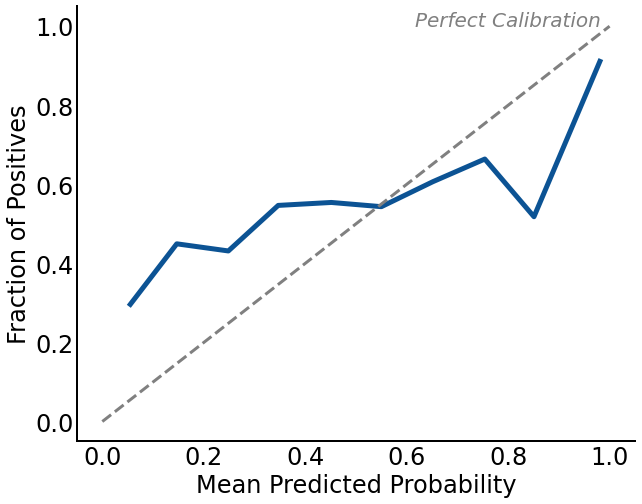

In [23]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Assuming BERT_test_results is a DataFrame or similar structure
predicted_probabilities = BERT_test_results['sigmoid_probability']
predicted_labels = BERT_test_results['predicted_label']
actual_labels = BERT_test_results['labels']

# Calculate reliability values for class 1 (positive class)
prob_true_class1, prob_pred_class1 = calibration_curve(actual_labels, predicted_probabilities, n_bins=10, strategy='uniform', pos_label=1)

# Calculate reliability values for class 0 (negative class)
# prob_true_class0, prob_pred_class0 = calibration_curve(actual_labels, 1 - predicted_probabilities, n_bins=10, strategy='uniform', pos_label=0)

fig, ax = plt.subplots(figsize=(10, 8))

# Plot calibration curves for both classes
plt.plot(prob_pred_class1, prob_true_class1, color='#0c5394ff', lw=5)
# plt.plot(prob_pred_class0, prob_true_class0, color='cornflowerblue', lw=5)

# Plot the perfect calibration line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=3)

# Label the lines directly on the plot
# plt.text(0.3, 0.59, 'Conservative\nCalibration', color='indianred', fontsize=24, ha='center' )
# plt.text(0.6, 0.29, 'Liberal\nCalibration', color='cornflowerblue', fontsize=24,  ha='center' )
plt.text(0.8, 1, 'Perfect Calibration', color='gray', fontsize=20,  ha='center', style= 'italic' )

plt.xlabel('Mean Predicted Probability', fontsize=24)
plt.ylabel('Fraction of Positives', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Remove spines and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='both', length=0)

plt.show()


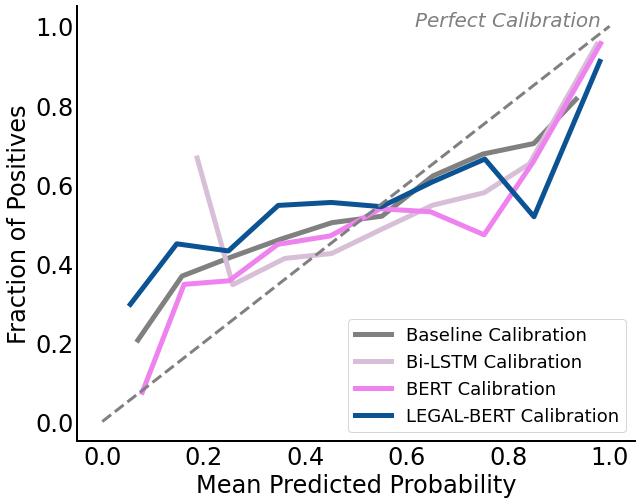

In [29]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

fig, ax = plt.subplots(figsize=(10, 8))

#Baseline
baseline_predicted_probabilities = baseline_test_results['Probability_Class_1']
baseline_actual_labels = baseline_test_results['label']
# Calculate reliability values for class 1 (positive class)
prob_true_class1, prob_pred_class1 = calibration_curve(baseline_actual_labels, baseline_predicted_probabilities, n_bins=10, strategy='uniform', pos_label=1)
# Plot calibration curves for both classes
plt.plot(prob_pred_class1, prob_true_class1, color='grey', lw=5, label='Baseline Calibration' )


#RNN 
RNN_LSTM_predicted_probabilities = RNN_LSTM_test_results['predicted_probability_rnn_lstm']
RNN_LSTM_actual_labels = RNN_LSTM_test_results['actual_label']
# Calculate reliability values for class 1 (positive class)
prob_true_class1, prob_pred_class1 = calibration_curve(RNN_LSTM_actual_labels, RNN_LSTM_predicted_probabilities, n_bins=10, strategy='uniform', pos_label=1)
# Plot calibration curves for both classes
plt.plot(prob_pred_class1, prob_true_class1, color='thistle', lw=5, label='Bi-LSTM Calibration' )

#BERT - regular
BERT_non_legal_results_predicted_probabilities = BERT_non_legal_results['sigmoid_probability']
BERT_non_legal_results_actual_labels = BERT_test_results['labels']
# Calculate reliability values for class 1 (positive class)
prob_true_class1, prob_pred_class1 = calibration_curve(BERT_non_legal_results_actual_labels, BERT_non_legal_results_predicted_probabilities, n_bins=10, strategy='uniform', pos_label=1)
# Plot calibration curves for both classes
plt.plot(prob_pred_class1, prob_true_class1, color='violet', lw=5, label='BERT Calibration' )


# Assuming BERT_test_results is a DataFrame or similar structure - LEGAL
predicted_probabilities = BERT_test_results['sigmoid_probability']
predicted_labels = BERT_test_results['predicted_label']
actual_labels = BERT_test_results['labels']
# Calculate reliability values for class 1 (positive class)
prob_true_class1, prob_pred_class1 = calibration_curve(actual_labels, predicted_probabilities, n_bins=10, strategy='uniform', pos_label=1)
# Plot calibration curves for both classes
plt.plot(prob_pred_class1, prob_true_class1, color='#0c5394ff', lw=5, label='LEGAL-BERT Calibration' )




# Plot the perfect calibration line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=3)

plt.text(0.8, 1, 'Perfect Calibration', color='gray', fontsize=20,  ha='center', style= 'italic' )

plt.xlabel('Mean Predicted Probability', fontsize=24)
plt.ylabel('Fraction of Positives', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Remove spines and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='both', length=0)
plt.legend(loc='lower right', fontsize=18)

plt.show()


In [33]:
# import matplotlib.pyplot as plt
# from sklearn.calibration import calibration_curve

# # Assuming BERT_test_results is a DataFrame or similar structure
# predicted_probabilities = RNN_LSTM_test_results['sigmoid_probability']
# predicted_labels = RNN_LSTM_test_results['predicted_label']
# actual_labels = RNN_LSTM_test_results['labels']

# # Calculate reliability values for class 1 (positive class)
# prob_true_class1, prob_pred_class1 = calibration_curve(actual_labels, predicted_probabilities, n_bins=10, strategy='uniform', pos_label=1)

# # Calculate reliability values for class 0 (negative class)
# prob_true_class0, prob_pred_class0 = calibration_curve(actual_labels, 1 - predicted_probabilities, n_bins=10, strategy='uniform', pos_label=0)


# fig, ax = plt.subplots(figsize=(10, 8))

# # Plot calibration curves for both classes
# plt.plot(prob_pred_class1, prob_true_class1, marker='o', linestyle='--', color='indianred', label='Conservative - Calibration Curve')
# plt.plot(prob_pred_class0, prob_true_class0, marker='o', linestyle='--', color='cornflowerblue', label='Liberal - Calibration Curve')

# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
# plt.xlabel('Mean Predicted Probability', fontsize=14)
# plt.ylabel('Fraction of Positives', fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.title('Calibration Curve for Partisan Classification - BERT (non-legal)', fontsize=16)
# plt.legend(fontsize=14, loc='lower right')

# plt.show()

In [40]:
RNN_LSTM_test_results.head()


,id,predicted_probability_rnn_lstm,predicted_label_rnn_lstm,actual_label
0,9420371,0.375743,0,1
1,103349,0.464305,0,1
2,103362,0.435018,0,0
3,103369,0.751206,1,0
4,103418,0.397387,0,0


In [32]:
# import matplotlib.pyplot as plt
# from sklearn.calibration import calibration_curve

# # Assuming BERT_test_results is a DataFrame or similar structure
# predicted_probabilities = RNN_LSTM_test_results['predicted_probability_rnn_lstm']
# predicted_labels = RNN_LSTM_test_results['predicted_label_rnn_lstm']
# actual_labels = RNN_LSTM_test_results['actual_label']

# # Calculate reliability values for class 1 (positive class)
# prob_true_class1, prob_pred_class1 = calibration_curve(actual_labels, predicted_probabilities, n_bins=10, strategy='uniform', pos_label=1)

# # Calculate reliability values for class 0 (negative class)
# prob_true_class0, prob_pred_class0 = calibration_curve(actual_labels, 1 - predicted_probabilities, n_bins=10, strategy='uniform', pos_label=0)


# fig, ax = plt.subplots(figsize=(10, 8))

# # Plot calibration curves for both classes
# plt.plot(prob_pred_class1, prob_true_class1, marker='o', linestyle='--', color='indianred', label='Conservative - Calibration Curve')
# plt.plot(prob_pred_class0, prob_true_class0, marker='o', linestyle='--', color='cornflowerblue', label='Liberal - Calibration Curve')

# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
# plt.xlabel('Mean Predicted Probability', fontsize=14)
# plt.ylabel('Fraction of Positives', fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.title('Calibration Curve for Partisan Classification - RNN LSTM', fontsize=16)
# plt.legend(fontsize=14, loc='lower right')

# plt.show()

In [31]:
# import matplotlib.pyplot as plt
# from sklearn.calibration import calibration_curve

# # Assuming BERT_test_results is a DataFrame or similar structure
# predicted_probabilities = baseline_test_results['Probability_Class_1']
# predicted_labels = baseline_test_results['Predictions']
# actual_labels = baseline_test_results['label']
# baseline_test_results
# # Calculate reliability values for class 1 (positive class)
# prob_true_class1, prob_pred_class1 = calibration_curve(actual_labels, predicted_probabilities, n_bins=10, strategy='uniform', pos_label=1)

# # Calculate reliability values for class 0 (negative class)
# prob_true_class0, prob_pred_class0 = calibration_curve(actual_labels, 1 - predicted_probabilities, n_bins=10, strategy='uniform', pos_label=0)


# fig, ax = plt.subplots(figsize=(10, 8))

# # Plot calibration curves for both classes
# plt.plot(prob_pred_class1, prob_true_class1, marker='o', linestyle='--', color='indianred', label='Conservative - Calibration Curve')
# plt.plot(prob_pred_class0, prob_true_class0, marker='o', linestyle='--', color='cornflowerblue', label='Liberal - Calibration Curve')

# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
# plt.xlabel('Mean Predicted Probability', fontsize=14)
# plt.ylabel('Fraction of Positives', fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.title('Calibration Curve for Partisan Classification - Baseline', fontsize=16)
# plt.legend(fontsize=14, loc='lower right')

# plt.show()

In [9]:
# predicted_probabilities = BERT_test_results['sigmoid_probability']
# predicted_labels = BERT_test_results['predicted_label']
# actual_labels = BERT_test_results['labels']


# # Calculate reliability values for class 1 (positive class)
# prob_true_class1, prob_pred_class1 = calibration_curve(actual_labels, predicted_probabilities, n_bins=10, strategy='uniform', pos_label=1)

# # Calculate reliability values for class 0 (negative class)
# prob_true_class0, prob_pred_class0 = calibration_curve(actual_labels, 1 - predicted_probabilities, n_bins=10, strategy='uniform', pos_label=0)

# # Calculate bin counts for both classes
# bin_counts_class0, bin_edges_class0 = np.histogram(1 - predicted_probabilities, bins=10)
# bin_counts_class1, bin_edges_class1 = np.histogram(predicted_probabilities, bins=10)

# # Create line plots for number of samples at each predicted probability bin
# fig, ax = plt.subplots(figsize=(10, 5))

# # Plot line for class 0
# ax.plot(np.linspace(0, 1, 10), bin_counts_class0, marker='o', linestyle='-', label='Class 0', color='orange')

# # Plot line for class 1
# ax.plot(np.linspace(0, 1, 10), bin_counts_class1, marker='o', linestyle='-', label='Class 1', color='blue')

# ax.set_xticks(np.linspace(0, 1, 10))
# ax.set_xticklabels([f'{round(x, 1)} - {round(x + 0.1, 1)}' for x in np.linspace(0, 1, 10)])

# plt.xlabel('Mean Predicted Probability')
# plt.ylabel('Number of Samples')
# plt.title('Number of Samples at Each Predicted Probability')
# plt.legend()
# plt.grid(True)
# plt.show()


In [17]:
predicted_probabilities = BERT_test_results['probability']
predicted_labels = BERT_test_results['predicted_label']
actual_labels = BERT_test_results['labels']

# Calculate the total number of original samples
total_samples = len(predicted_probabilities)

# Calculate accuracy
accuracy = accuracy_score(actual_labels,predicted_labels)

# Identify indices of samples to remove (predictions in the range [0.45, 0.55])
remove_indices = (predicted_probabilities >= 0.6) 
filtered_predicted_probabilities = predicted_probabilities[~remove_indices]
filtered_predicted_labels = (filtered_predicted_probabilities >= 0.5).astype(int)
filtered_actual_labels = actual_labels[~remove_indices]

selective_accuracy = accuracy_score(filtered_actual_labels, filtered_predicted_labels)

# Count the number of samples removed
num_samples_removed = sum(remove_indices)

print(f"Total Number of Original Samples: {total_samples}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Selective Accuracy: {selective_accuracy:.4f}")
print(f"Number of samples removed: {num_samples_removed}")


Total Number of Original Samples: 2618
Accuracy: 0.6788
Selective Accuracy: 0.5492
Number of samples removed: 2323


In [9]:
BERT_test_results

,Unnamed: 0,id,cluster_id,type,date_filed,scdb_decision_direction,labels,predicted_label,probability,sigmoid_probability
0,0,9420371,104708,020lead,1949-06-27,1.0,1,1,0.518619,0.518619
1,1,103349,103349,010combined,1940-04-29,1.0,1,0,0.797333,0.202667
2,2,103362,103362,010combined,1940-05-20,2.0,0,0,0.926838,0.073162
3,3,103369,103369,010combined,1940-05-27,2.0,0,0,0.928312,0.071688
4,4,103418,103418,010combined,1941-02-03,2.0,0,0,0.533091,0.466909
...,...,...,...,...,...,...,...,...,...,...
2613,2613,103037,103037,010combined,1938-05-16,1.0,1,0,0.975266,0.024734
2614,2614,102807,102807,010combined,1937-04-12,2.0,0,0,0.969251,0.030749
2615,2615,109339,109339,010combined,1976-01-13,1.0,1,0,0.723542,0.276458
2616,2616,104473,104473,010combined,1947-11-17,2.0,0,0,0.968192,0.031808


In [22]:

# Assuming df is your DataFrame containing the results
# You may need to replace 'column_name' with the actual column names from your DataFrame

predicted_labels = BERT_test_results['predicted_label']
actual_labels = BERT_test_results['labels']
baseline_test_results['Probability_Class_1']
# Compute confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Compute precision, recall, and F1 score
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print accuracy by class
class_report = classification_report(actual_labels, predicted_labels, output_dict=True)
# Print accuracy for each class
print("Accuracy by Class:")
for class_label, metrics in class_report.items():
    if class_label.isdigit():  # Check if the label is a class (assumes class labels are integers)
        accuracy = metrics['precision']  # Precision is used as accuracy for binary classification
        print(f"Class {class_label}: {accuracy:.2f}")

Confusion Matrix:
[[ 775  299]
 [ 542 1002]]

Precision: 0.7701767870868562
Recall: 0.6489637305699482
F1 Score: 0.7043936731107205
Accuracy by Class:
Class 0: 0.59
Class 1: 0.77


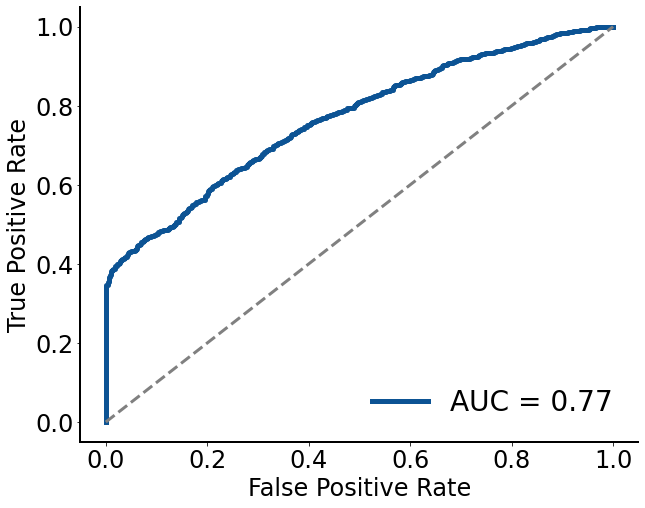

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

predicted_probabilities = BERT_test_results['sigmoid_probability']
actual_labels = BERT_test_results['labels']

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)

# Compute AUC
auc = roc_auc_score(actual_labels, predicted_probabilities)

# Plot ROC curve
plt.figure(figsize=(10, 8))

plt.plot(fpr, tpr, color='#0c5394ff', lw=5, label=f'AUC = {auc:.2f}')  # Increase linewidth to 3
plt.plot([0, 1], [0, 1], color='gray', lw=3, linestyle='--')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate', fontsize=24)

# Remove legend box
plt.legend(loc='lower right', fontsize=28, frameon=False)

# Remove black box around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)  # Set linewidth of x-axis
plt.gca().spines['left'].set_linewidth(2)    # Set linewidth of y-axis

plt.show()


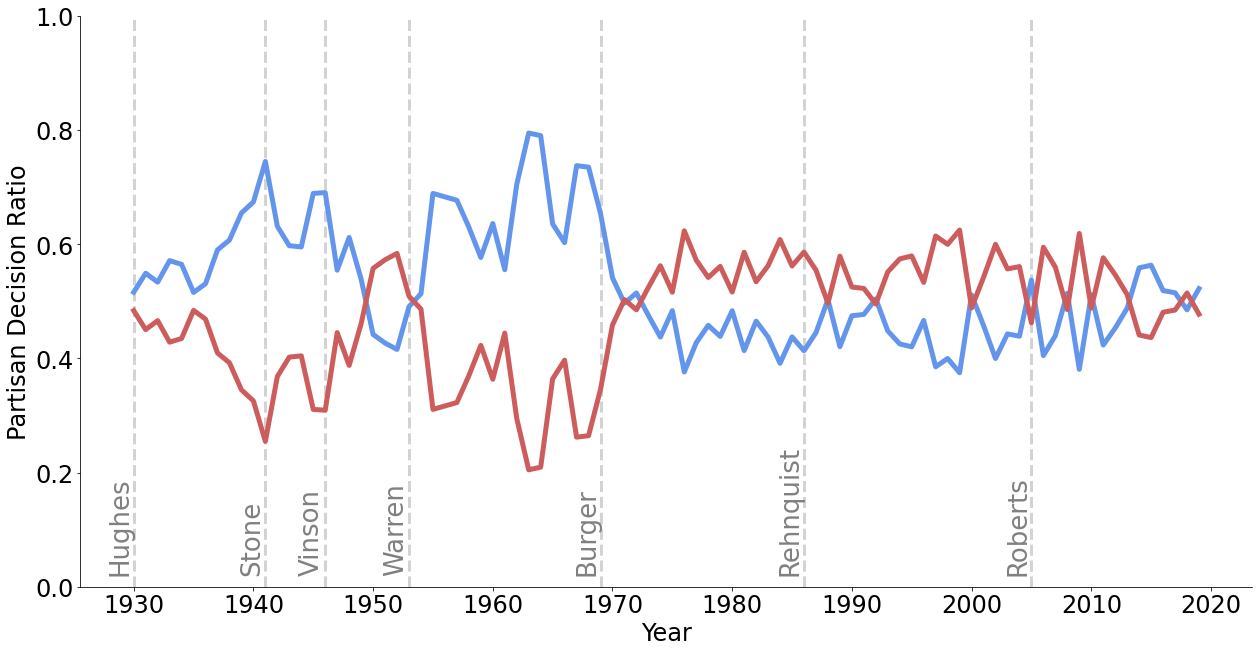

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

sc_data = pd.read_csv('/vast/amr10211/opinions-cluster-data-sc.csv')

sc_data['date'] = pd.to_datetime(sc_data['date_filed'])

sc_data['year'] = sc_data['date'].dt.year

sc_data = sc_data[sc_data['year'] >= 1930]

sc_data['label'] = sc_data['scdb_decision_direction'].map({1.0: 1, 2.0: 0})

# Group by date and calculate the percentage of liberal and conservative opinions
grouped_data = sc_data.groupby(['year', 'label']).size().unstack(fill_value=0)
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data['percentage_liberal'] = (grouped_data[0] / grouped_data['total'])
grouped_data['percentage_conservative'] = (grouped_data[1] / grouped_data['total']) 

plt.figure(figsize=(21, 10.5))
chief_justices = {'Hughes': 1930, 'Stone': 1941, 'Vinson': 1946, 'Warren':1953, 'Burger':1969, 'Rehnquist':1986, 'Roberts':2005}


for justice, year in chief_justices.items():
    plt.axvline(x=year, linestyle='--', color='lightgray', lw=3)
    plt.text(year, 0.02, justice, rotation=90, fontsize=26, va='bottom', ha='right', color='gray')
plt.plot(grouped_data.index, grouped_data['percentage_liberal'], label='Liberal', color='cornflowerblue', lw=5)
plt.plot(grouped_data.index, grouped_data['percentage_conservative'], label='Conservative', color='indianred', lw=5)


plt.xlabel('Year', fontsize=24)
plt.ylabel('Partisan Decision Ratio', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0,1)
plt.xticks(np.arange(1930, 2021, 10), fontsize=24)
# plt.legend(fontsize=24)

sns.despine()
plt.grid(False)
sns.despine()
plt.ylim(0,1)
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
plt.savefig('your_plot.png', transparent=True)
plt.show()


RNN LSTM AUC: 0.6943878699411322
BERT (non-legal) AUC: 0.7559375633195358
BERT (non-legal) AUC: 0.7678802307966924
BERT (legal) AUC: 0.7678802307966924


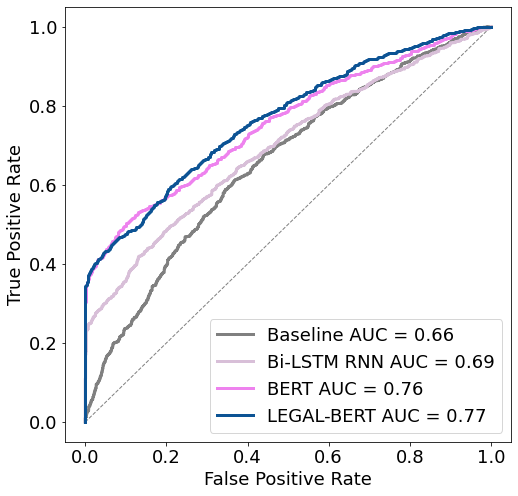

In [24]:

#RNN LSTM
RNN_LSTM_predicted_probabilities = RNN_LSTM_test_results['predicted_probability_rnn_lstm']
RNN_LSTM_actual_labels = RNN_LSTM_test_results['actual_label']
# Compute ROC curve
RNN_LSTM_fpr, RNN_LSTM_tpr, RNN_LSTM_thresholds = roc_curve(RNN_LSTM_actual_labels, RNN_LSTM_predicted_probabilities)
# Compute AUC
RNN_LSTM_auc = roc_auc_score(RNN_LSTM_actual_labels, RNN_LSTM_predicted_probabilities)
# Print AUC
print("RNN LSTM AUC:", RNN_LSTM_auc)


#BERT (non-legal)
BERT_non_legal_results_predicted_probabilities = BERT_non_legal_results['sigmoid_probability']
BERT_non_legal_results_actual_labels = BERT_test_results['labels']
# Compute ROC curve
BERT_non_legal_results_fpr, BERT_non_legal_results_tpr, BERT_non_legal_results_thresholds = roc_curve(BERT_non_legal_results_actual_labels, BERT_non_legal_results_predicted_probabilities)
# Compute AUC
BERT_non_legal_results_auc = roc_auc_score(BERT_non_legal_results_actual_labels, BERT_non_legal_results_predicted_probabilities)
# Print AUC
print("BERT (non-legal) AUC:", BERT_non_legal_results_auc)


#BERT (legal)
predicted_probabilities = BERT_test_results['sigmoid_probability']
actual_labels = BERT_test_results['labels']
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
# Compute AUC
auc = roc_auc_score(actual_labels, predicted_probabilities)
# Print AUC
print("BERT (non-legal) AUC:", auc)

#Baseline
baseline_predicted_probabilities = baseline_test_results['Probability_Class_1']
baseline_actual_labels = baseline_test_results['label']
# Compute ROC curve
baseline_fpr, baseline_tpr, baseline_thresholds = roc_curve(baseline_actual_labels, baseline_predicted_probabilities)
# Compute AUC
baseline_auc = roc_auc_score(baseline_actual_labels, baseline_predicted_probabilities)
# Print AUC
print("BERT (legal) AUC:", auc)


# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.plot(baseline_fpr, baseline_tpr, color='grey', lw=3, label=f'Baseline AUC = {baseline_auc:.2f}')
plt.plot(RNN_LSTM_fpr, RNN_LSTM_tpr, color='thistle', lw=3, label=f'Bi-LSTM RNN AUC = {RNN_LSTM_auc:.2f}')
plt.plot(BERT_non_legal_results_fpr, BERT_non_legal_results_tpr, color='violet', lw=3, label=f'BERT AUC = {BERT_non_legal_results_auc:.2f}')
plt.plot(fpr, tpr, color='#0c5394ff', lw=3, label=f'LEGAL-BERT AUC = {auc:.2f}')

plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.title('ROC Curve', fontsize=24)
plt.legend(loc='lower right', fontsize=18)



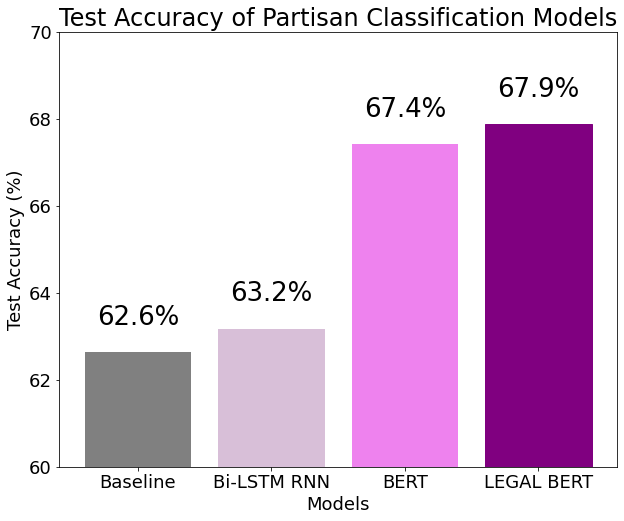

In [3]:
import matplotlib.pyplot as plt

models = ['Baseline', 'Bi-LSTM RNN', 'BERT', 'LEGAL BERT']
accuracies = [0.6264, 0.6318, 0.6742, 0.6788]

# Convert accuracies to percentages
accuracies_percent = [acc * 100 for acc in accuracies]

# Find the index of the best model
best_model_index = accuracies_percent.index(max(accuracies_percent))

# Bar plot
plt.figure(figsize=(10, 8))  # Increase the figure size for a poster

# Use a larger font size for labels and title
plt.rc('font', size=14)

bars = plt.bar(models, accuracies_percent, color=['grey', 'thistle', 'violet', 'darkviolet'])

# Highlight the best model with a different color
bars[best_model_index].set_color('purple')

# Add labels and title
plt.xlabel('Models', fontsize=18)
plt.ylabel('Test Accuracy (%)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Test Accuracy of Partisan Classification Models', fontsize=24)

# Round the test accuracy values to one decimal place and display as percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=26)

# Set y-axis limits for better visualization
plt.ylim(60, 70)

# Rotate x-axis labels slightly for better readability
# plt.xticks(ha='right')

# Show the plot
plt.show()


In [26]:
# # Filter samples with predicted probabilities outside the range [0.45, 0.55]
# mask = (predicted_probabilities < 0.45) | (predicted_probabilities > 0.55)
# filtered_predicted_probabilities = predicted_probabilities[mask]
# filtered_actual_labels = actual_labels[mask]

# # Compute ROC curve and AUC for the filtered data
# fpr, tpr, thresholds = roc_curve(filtered_actual_labels, filtered_predicted_probabilities)
# auc = roc_auc_score(filtered_actual_labels, filtered_predicted_probabilities)

# # Print selective AUC
# print("Selective AUC (excluding samples with predicted probabilities between 0.45 and 0.55):", auc)

# # Plot ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'Selective AUC = {auc:.2f}')
# plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve (Selective AUC)')
# plt.legend(loc='lower right')
# plt.show()


In [27]:
# # Convert 'date_filed' to datetime
# BERT_test_results['date_filed'] = pd.to_datetime(BERT_test_results['date_filed'])

# # Extract the year
# BERT_test_results['year'] = BERT_test_results['date_filed'].dt.year

# # Initialize lists to store years and accuracies
# years = []
# accuracies = []

# # Iterate through unique years
# for year in BERT_test_results['year'].unique():
#     # Filter data for the specific year
#     year_data = BERT_test_results[BERT_test_results['year'] == year]
    
#     # Calculate accuracy for the year
#     accuracy = accuracy_score(year_data['labels'], year_data['predicted_label'])
    
#     # Append year and accuracy to lists
#     years.append(year)
#     accuracies.append(accuracy)

# # Create a bar plot
# plt.figure(figsize=(10, 6))
# plt.bar(years, accuracies, color='skyblue')
# plt.xlabel('Year of Date Filed')
# plt.ylabel('Accuracy')
# plt.title('Accuracy by Year of Date Filed')
# plt.xticks(rotation=45)
# plt.show()


In [28]:
# # Convert 'date_filed' to datetime
# BERT_test_results['date_filed'] = pd.to_datetime(BERT_test_results['date_filed'])

# # Extract the year
# BERT_test_results['year'] = BERT_test_results['date_filed'].dt.year

# # Initialize lists to store years, actual classes, and accuracies
# years = []
# actual_classes = []
# accuracies_class0 = []
# accuracies_class1 = []

# # Iterate through unique years and actual classes
# for year in BERT_test_results['year'].unique():
#     for actual_class in BERT_test_results['labels'].unique():
#         # Filter data for the specific year and actual class
#         year_class_data = BERT_test_results[(BERT_test_results['year'] == year) & (BERT_test_results['labels'] == actual_class)]
        
#         # Calculate accuracy for the year and actual class
#         accuracy = accuracy_score(year_class_data['labels'], year_class_data['predicted_label'])
        
#         # Append year, actual class, and accuracy to lists
#         years.append(year)
#         actual_classes.append(actual_class)
#         if actual_class == 0:
#             accuracies_class0.append(accuracy)
#         else:
#             accuracies_class1.append(accuracy)

# # Create a grouped bar plot
# fig, ax = plt.subplots(figsize=(12, 8))
# bar_width = 0.3

# # Plot bars for each actual class
# bar1 = ax.bar([year - bar_width / 2 for year in BERT_test_results['year'].unique()], accuracies_class0, bar_width, label='Actual Class 0')
# bar2 = ax.bar([year + bar_width / 2 for year in BERT_test_results['year'].unique()], accuracies_class1, bar_width, label='Actual Class 1')

# ax.set_xlabel('Year of Date Filed')
# ax.set_ylabel('Accuracy')
# ax.set_title('Accuracy by Actual Class and Year')
# ax.set_xticks(BERT_test_results['year'].unique())
# ax.legend()

# plt.show()


In [29]:
# # Convert 'date_filed' to datetime
# BERT_test_results['date_filed'] = pd.to_datetime(BERT_test_results['date_filed'])

# # Extract the year
# BERT_test_results['year'] = BERT_test_results['date_filed'].dt.year

# # Initialize lists to store years, actual classes, and selective accuracies
# years = []
# actual_classes = []
# selective_accuracies_class0 = []
# selective_accuracies_class1 = []

# # Iterate through unique years and actual classes
# for year in BERT_test_results['year'].unique():
#     for actual_class in BERT_test_results['labels'].unique():
#         # Filter data for the specific year and actual class
#         year_class_data = BERT_test_results[(BERT_test_results['year'] == year) & (BERT_test_results['labels'] == actual_class)]
        
#         # Filter samples with predicted probabilities outside the range [0.45, 0.55]
#         mask = (year_class_data['sigmoid_probability'] < 0.45) | (year_class_data['sigmoid_probability'] > 0.55)
#         filtered_data = year_class_data[mask]
        
#         # Calculate accuracy for the filtered data
#         selective_accuracy = accuracy_score(filtered_data['labels'], filtered_data['predicted_label'])
        
#         # Append year, actual class, and selective accuracy to lists
#         years.append(year)
#         actual_classes.append(actual_class)
#         if actual_class == 0:
#             selective_accuracies_class0.append(selective_accuracy)
#         else:
#             selective_accuracies_class1.append(selective_accuracy)

# # Create a grouped bar plot for selective accuracy
# fig, ax = plt.subplots(figsize=(12, 8))
# bar_width = 0.35

# # Plot bars for each actual class
# bar1 = ax.bar([year - bar_width / 2 for year in BERT_test_results['year'].unique()], selective_accuracies_class0, bar_width, label='Actual Class 0')
# bar2 = ax.bar([year + bar_width / 2 for year in BERT_test_results['year'].unique()], selective_accuracies_class1, bar_width, label='Actual Class 1')

# ax.set_xlabel('Year of Date Filed')
# ax.set_ylabel('Selective Accuracy (Excluding 0.45-0.55)')
# ax.set_title('Selective Accuracy by Actual Class and Year')
# ax.set_xticks(BERT_test_results['year'].unique())
# ax.legend()

# plt.show()


In [30]:
# # Convert 'date_filed' to datetime
# BERT_test_results['date_filed'] = pd.to_datetime(BERT_test_results['date_filed'])

# # Extract the year
# BERT_test_results['year'] = BERT_test_results['date_filed'].dt.year

# # Initialize lists to store years, class 0 counts, and class 1 counts
# years = []
# class0_counts = []
# class1_counts = []

# # Iterate through unique years
# for year in BERT_test_results['year'].unique():
#     # Filter data for the specific year
#     year_data = BERT_test_results[BERT_test_results['year'] == year]
    
#     # Count occurrences of each class
#     class0_count = (year_data['labels'] == 0).sum()
#     class1_count = (year_data['labels'] == 1).sum()
    
#     # Append year and counts to lists
#     years.append(year)
#     class0_counts.append(class0_count)
#     class1_counts.append(class1_count)

# # Create a grouped bar plot for counts
# fig, ax = plt.subplots(figsize=(12, 8))
# bar_width = 0.35

# # Plot bars for each class
# bar1 = ax.bar([year - bar_width / 2 for year in BERT_test_results['year'].unique()], class0_counts, bar_width, label='Class 0')
# bar2 = ax.bar([year + bar_width / 2 for year in BERT_test_results['year'].unique()], class1_counts, bar_width, label='Class 1')

# ax.set_xlabel('Year of Date Filed')
# ax.set_ylabel('Count')
# ax.set_title('Counts of Each Class by Year')
# ax.set_xticks(BERT_test_results['year'].unique())
# ax.legend()

# plt.show()
